<h1 style="text-align:center">MCHE 513: Intermediate Dynamics</h1>
<h3 style="text-align:center">Mid-Term 1 &mdash; Fall 2015</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

We'll use the [Sympy](http://www.sympy.org/) library to solve these problems analytically. To use it, we need to import it.

In [1]:
# import Sympy and start "pretty printing"
import sympy
sympy.init_printing()

In [2]:
# We also want to import the sympy.physics.mechanics module

# Note that * imports are usually considered bad practice
from sympy.physics.mechanics import *

## Problem 1
The system in Figure 1 consists of cart being pushed by pin P, which moves in a slot that is fixed in an inertial frame. The cart is capable of measuring the vertical position of the pin and finds the height able to be described by $s(t) = 10 - 3t - 4t^2$m. The radius of curvature of the slot in the position shown is $\rho = 10$m. The time shown in the figure represents $t=0$. Find the velocity and acceleration of the cart at this instant.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/Cart_with_Slot.png" alt="Cart with Slot" width=50%><br>
    <strong>Figure 1: Cart with Slot</strong>
</p>

In [3]:
u, vc, s = dynamicsymbols('u v_c s')
u_dot, vc_dot, s_dot = dynamicsymbols('u v_c s', 1)
rho, beta = sympy.symbols('rho beta')

N = ReferenceFrame('N')

In [4]:
# Define the point O in the fixed frame
O = Point('O')
O.set_vel(N, vc * N.x)

In [5]:
u, u_dot, vc, ac, rho, beta = sympy.symbols('u u_dot v_c ac rho beta')

In [6]:
# the j-direction equation gives u
u_t0 = sympy.solve(-u * sympy.sin(beta) + 3, u)[0].subs(beta, sympy.pi/6)
u_t0

In [7]:
# now, substitute into the i-direction to solve for vc
sympy.solve(u_t0 * sympy.cos(beta) - vc, vc)[0].subs(beta, sympy.pi/6)

In [8]:
u_dot_t0 = sympy.solve(-u_dot * sympy.sin(beta) - u_t0**2 / rho * sympy.cos(beta) + 8, u_dot)[0].subs([(rho, 10), (beta, sympy.pi/6)])
sympy.solve(u_dot_t0 * sympy.cos(beta) - u_t0**2 / rho * sympy.sin(beta) - ac, ac)[0].subs([(rho, 10), (beta, sympy.pi/6)]).evalf()

## Problem 2
The system shown in Figure 2 is a machine used for testing golf clubs. Figure 3 is a sketch of the system. It consists of a base and a main link, $OA$, of length $L_1$ at a fixed angle from vertical, $\theta$. Link $AB$ has length $L_2$ and is driven around the $z'$ axis according to $\beta$. Finally, link BC, representing the golf club, has length $L_3$ and rotates about point B through a driven pin-like joint.

a. Write the angular velocity and acceleration of link BC. For each, be sure to indicate how to resolve all the components into the same frame.    
b. What is the velocity of point C?    
c. What is the acceleration of point C? 

<p style="text-align:center">
	<img src="http://www.mygolfspy.com/wp-content/uploads/2013/08/Iron-Byron-1-2.jpg" alt="Golf Club Robot Image" width=50%><br>
    <strong>Figure 2: Golf Club Robot <br><span style="font-size:85%">(Image from: http://www.mygolfspy.com/golf-club-testing-results-you-can-trust/)</span></strong>
</p>
<p style="text-align:center">
	<img src="http://shared.crawlab.org/GolfClubRobot.png" alt="Golf Club Robot Sketch" width=50%><br>
    <strong>Figure 3: Golf Club Robot Sketch</strong>
</p>

In [9]:
theta, beta, phi = dynamicsymbols('theta beta phi')
theta_dot, beta_dot, phi_dot = dynamicsymbols('theta beta phi', 1)
L1, L2, L3 = sympy.symbols('L_1 L_2 L_3')

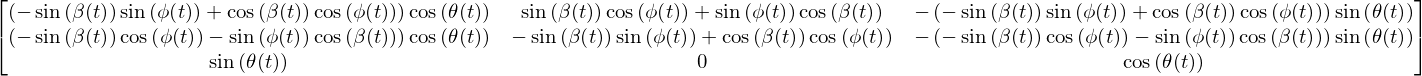

In [10]:
N = ReferenceFrame('N')
N_prime = N.orientnew('N_{prime}', 'Axis', [theta, N.y])
N_dbl_prime = N_prime.orientnew('N_{dbl-prime}', 'Axis', [beta, N_prime.z])
N_final = N_dbl_prime.orientnew('N_{final}', 'Axis', [phi, N_dbl_prime.z])

# We can also write rotation matrices
# The rotation, or Direction Cosing Matrix (dcm), between the final set of axes and N
N_final.dcm(N)

In [11]:
# Define the point O in the fixed frame
O = Point('O')
O.set_vel(N, 0 * N.x)

# Define the other points
# We can use the intermediate frames to do so
A = O.locatenew('A', L1 * N_prime.z)
B = A.locatenew('B', L2 * N_dbl_prime.x)
C = B.locatenew('C', L3 * N_final.x)

# Sympy will calculate the position based on our points defined above
C.pos_from(O)

# Sympy can also express that position into a single frame
C.pos_from(O).express(N)

In [12]:
# Sympy can also express that position into a single frame
C.pos_from(O).express(N)

In [13]:
# Now, we can write the angular velocity
N_final.ang_vel_in(N)

In [14]:
# We can also express the angular velocity in a single frame
N_final.ang_vel_in(N).express(N)

In [15]:
# We can write the angular acceleration in a similar way
N_final.ang_acc_in(N)

In [16]:
# We can also express it in a single frame
N_final.ang_acc_in(N).express(N)

In [17]:
# We can also easily write the velocity of point C

# Define the velocity of point A
# Use the .v2pt_theory() to calculate the compoent from the rotation of L1
A.set_vel(N_prime, A.v2pt_theory(O, N, N_prime))

# Define the velocity of point B
# Use the .v2pt_theory() to calculate the compoent from the rotation of L2
B.set_vel(N_dbl_prime, B.v2pt_theory(A, N_prime, N_dbl_prime))

# We use the .v2pt_theory() to calculate the compoent from the rotation of L3
C.v2pt_theory(B, N_dbl_prime, N_final)

In [18]:
# This vector can be expressed in the fixed reference frame N
C.v2pt_theory(B, N_dbl_prime, N_final).express(N)

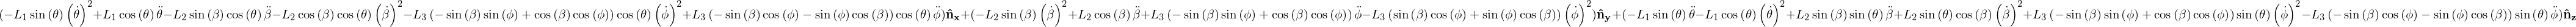

In [19]:
# Acceleration is calculated and express in the fixed frame in a similar manner
A.set_acc(N_prime, A.a2pt_theory(O, N, N_prime))
B.set_acc(N_dbl_prime, B.a2pt_theory(A, N_prime, N_dbl_prime))
C.a2pt_theory(B, N_dbl_prime, N_final).express(N)

## Problem 3
Figure 4 shows a disk of radius $R$ spinning about link $AB$ according to $\dot{\phi}$. Bar $AB$ is connected to the vertical link by a perfect pin, and its angle relative to the vertical link is described by $\theta$. The system is rotating about the vertical link according to $\dot{\psi}$. Point $B$ is a point on the top of the disk.

a. Using the fixed, inertial frame, $XYZ$, write angular velocity of the disk.    
b. What is the angular acceleration of the disk?    
c. What is the velocity of point B?    
d. What is the acceleration of point B?   

<p style="text-align:center">
	<img src="http://shared.crawlab.org/mill_in_precession.png" alt="Mill in Precession" width=50%><br>
    <strong>Figure 4: Mill in Precession</strong>
</p>

The frames and angles used in the solution are summarized in Figure 5. Frame x$'$y$'$z$'$ rotates about the Z-axis according to $\psi$. Frame xyz is fixed to link between A and the center of the disk.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/mill_in_precession_frames.png" alt="Frames and Angles" width=60%><br>
    <strong>Figure 5: Frames and Angles</strong>
</p>

In [20]:
psi, theta, phi = dynamicsymbols('psi theta phi')
psi_dot, theta_dot, phi_dot = dynamicsymbols('psi theta phi', 1)
L, R = sympy.symbols('L R')

In [21]:
# Fixed, inertial frame
N = ReferenceFrame('N')

# Frame rotating about Z according to psi
N_prime = N.orientnew('N_{prime}', 'Axis', [psi, N.z])

# Frame fixed to link AC
N_final = N_prime.orientnew('N_{final}', 'Axis', [(sympy.pi/2 - theta), N_prime.y])

# Frame fixed to disk
N_disk = N_final.orientnew('N_{disk}', 'Axis', [phi, N_final.x])

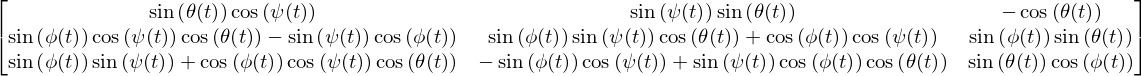

In [22]:
# We can also write rotation matrices
# The rotation, or Direction Cosing Matrix (dcm), between the final set of axes and N
N_disk.dcm(N)

In [23]:
# Now, we can write the angular velocity
N_disk.ang_vel_in(N)

In [24]:
# We can also express the angular velocity in a single frame
N_disk.ang_vel_in(N).express(N)

In [25]:
# We can write the angular acceleration in a similar way
N_disk.ang_acc_in(N)

In [26]:
# We can also express it in a single frame
N_disk.ang_acc_in(N).express(N)

In [46]:
# Define the point O in the fixed frame
A = Point('A')
A.set_vel(N, 0 * N_prime.x) # Point A is stationary in both N and N_prime

# Define the other points
# We can use the intermediate frames to do so
C = A.locatenew('C', L * N_final.x)
B = C.locatenew('B', R * N_final.z)

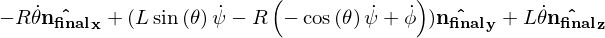

In [55]:
# Define the velocity of point B
# Use the .v2pt_theory() to calculate the compoent from the rotation of L
C.set_vel(N, C.v2pt_theory(A, N, N_final))

B.v2pt_theory(C, N, N_disk)

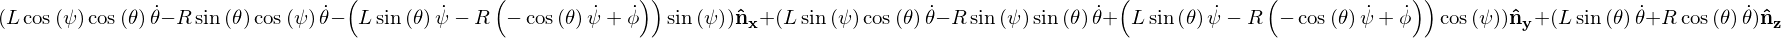

In [54]:
# We can also express the angular velocity in a single frame
B.v2pt_theory(C, N, N_disk).express(N)

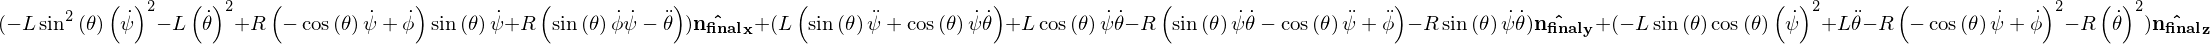

In [56]:
# Define the acceleration of point B
# Use the .apt_theory() to calculate the compoent from the rotation of L
C.set_acc(N, C.a2pt_theory(A, N, N_final))

B.a2pt_theory(C, N, N_disk)

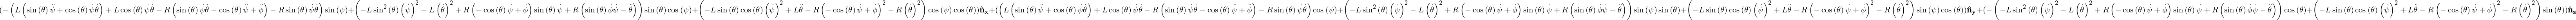

In [57]:
# We can also express the angular velocity in a single frame
B.a2pt_theory(C, N, N_disk).express(N)

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.
    

In [32]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())